In [2]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import numpy as np

# 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

/tmp/ipykernel_3128805/1675639801.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(theta_group, shade=True, label=f'{group} 그룹')
/tmp/ipykernel_3128805/1675639801.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(theta_group, shade=True, label=f'{group} 그룹')


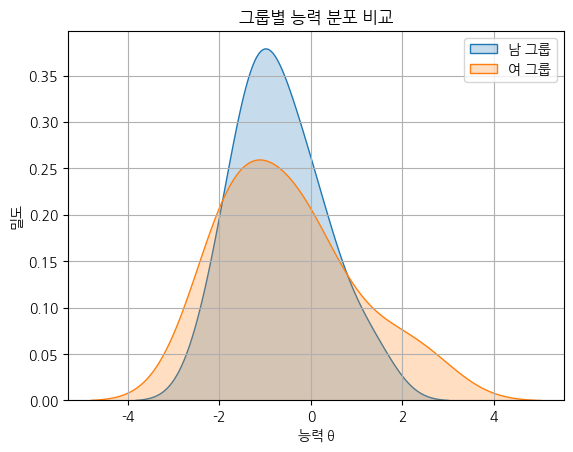

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 수험생 능력 추정치 로드
examinee_parameters = pd.read_csv('수험생_능력_추정치.csv', encoding='utf-8-sig')
theta_est = examinee_parameters['능력 추정치 (theta)'].values

# 그룹 정보 로드 (예: 성별)
df = pd.read_csv('응답_데이터.csv', encoding='utf-8')
group_labels = df['성별'].values

# 그룹별 능력 추정치 분리
group_names = np.unique(group_labels)
for group in group_names:
    theta_group = theta_est[group_labels == group]
    sns.kdeplot(theta_group, shade=True, label=f'{group} 그룹')

plt.xlabel('능력 θ')
plt.ylabel('밀도')
plt.title('그룹별 능력 분포 비교')
plt.legend()
plt.grid(True)
plt.show()

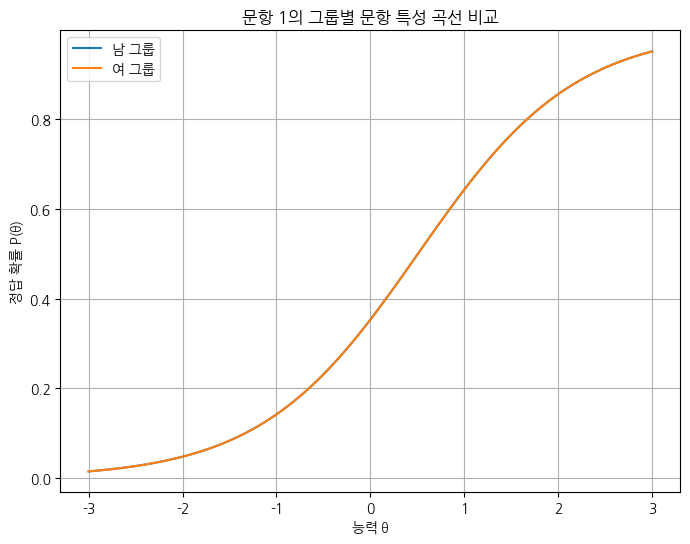

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. 저장된 문항 매개변수 로드
item_parameters = pd.read_csv('문항_매개변수.csv', encoding='utf-8-sig')
alpha_est = item_parameters['변별도 (alpha)'].values
beta_est = item_parameters['난이도 (beta)'].values

# 2. 저장된 수험생 능력 추정치 로드
examinee_parameters = pd.read_csv('수험생_능력_추정치.csv', encoding='utf-8-sig')
theta_est = examinee_parameters['능력 추정치 (theta)'].values

# 3. 응답 데이터 로드 및 그룹 정보 추출
df = pd.read_csv('응답_데이터.csv', encoding='utf-8')

# 그룹 정보 가져오기 (예: 성별)
group_labels = df['성별'].values  # 또는 다른 그룹 변수 사용 가능

# 그룹 이름 추출
group_names = np.unique(group_labels)

# 4. 특정 문항 선택
item_index = 0  # 문항 번호 (0부터 시작)

# 5. 그룹별 문항 특성 곡선 그리기
plt.figure(figsize=(8, 6))

theta_range = np.linspace(-3, 3, 100)

alpha_i = alpha_est[item_index]
beta_i = beta_est[item_index]

for group in group_names:
    # 그룹에 속한 수험생들의 능력 추정치
    theta_group = theta_est[group_labels == group]
    # 그룹별 평균 능력 추정치 (필요한 경우 사용)
    theta_group_mean = theta_group.mean()

    # 문항 특성 곡선 계산
    p_theta = 1 / (1 + np.exp(-alpha_i * (theta_range - beta_i)))

    # 그래프 그리기
    plt.plot(theta_range, p_theta, label=f'{group} 그룹')

# 그래프 설정
plt.xlabel('능력 θ')
plt.ylabel('정답 확률 P(θ)')
plt.title(f'문항 {item_index+1}의 그룹별 문항 특성 곡선 비교')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
# 그룹별로 문항 매개변수를 추정하려면 모델을 그룹별로 실행해야 합니다.
# 여기서는 예시로 그룹별 문항 난이도 평균을 계산합니다.
# 응답 데이터 로드
df = pd.read_csv('응답_데이터.csv', encoding='utf-8')

# 그룹 정보 추출 (예: 성별)
group_labels = df['성별'].values
group_names = np.unique(group_labels)

# 'OX리스트' 열을 2차원 배열로 변환하는 함수 정의
def ox_to_binary(ox_string):
    return [1 if char == 'O' else 0 for char in ox_string]

# 응답 데이터를 처리하여 NumPy 배열로 변환
df['responses'] = df['OX리스트'].apply(ox_to_binary)
response_data = pd.DataFrame(df['responses'].tolist())
data = response_data.values

# 문항 수 정의
n_items = data.shape[1]

group_beta_means = {}
for group in group_names:
    group_indices = np.where(group_labels == group)[0]
    # 그룹의 응답 데이터 추출
    group_data = data[group_indices, :]
    # 그룹별로 문항 난이도 평균 계산 (단순 평균으로 예시)
    group_beta_mean = group_data.mean(axis=0)
    group_beta_means[group] = group_beta_mean

# 결과를 데이터프레임으로 정리
group_beta_df = pd.DataFrame(group_beta_means)
group_beta_df.index = [f'문항 {i+1}' for i in range(n_items)]
print(group_beta_df)

              남         여
문항 1   0.294118  0.230769
문항 2   0.352941  0.461538
문항 3   0.235294  0.384615
문항 4   0.235294  0.307692
문항 5   0.294118  0.307692
문항 6   0.176471  0.461538
문항 7   0.235294  0.230769
문항 8   0.235294  0.307692
문항 9   0.294118  0.384615
문항 10  0.294118  0.307692
문항 11  0.411765  0.384615
문항 12  0.176471  0.307692
문항 13  0.294118  0.307692
문항 14  0.294118  0.307692
문항 15  0.235294  0.384615
문항 16  0.352941  0.153846
문항 17  0.352941  0.461538
문항 18  0.352941  0.384615
문항 19  0.235294  0.384615
문항 20  0.352941  0.538462
문항 21  0.294118  0.384615
문항 22  0.470588  0.384615
문항 23  0.294118  0.307692
문항 24  0.176471  0.538462
문항 25  0.235294  0.384615
문항 26  0.470588  0.307692
문항 27  0.411765  0.153846
문항 28  0.235294  0.461538
문항 29  0.235294  0.461538
문항 30  0.411765  0.230769
문항 31  0.294118  0.307692
문항 32  0.470588  0.538462
문항 33  0.294118  0.307692
문항 34  0.294118  0.307692
문항 35  0.235294  0.307692
문항 36  0.352941  0.307692
문항 37  0.235294  0.461538
문항 38  0.411

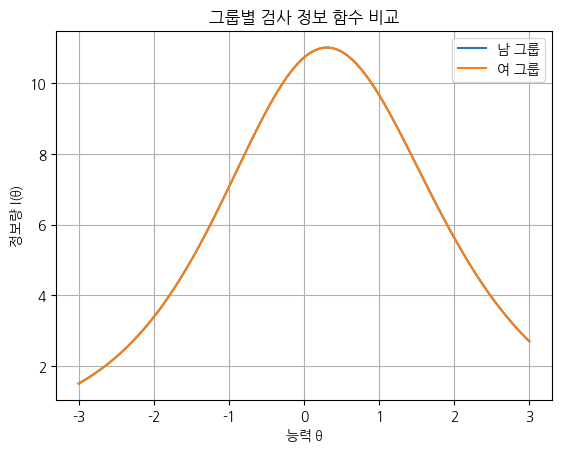

In [9]:
theta_range = np.linspace(-3, 3, 100)

for group in group_names:
    # 그룹별 능력 추정치
    theta_group = theta_est[group_labels == group]
    # 그룹별 검사 정보 함수 계산
    tif = np.zeros_like(theta_range)
    for i in range(n_items):
        alpha_i = alpha_est[i]
        beta_i = beta_est[i]
        p_theta = 1 / (1 + np.exp(-alpha_i * (theta_range - beta_i)))
        info_theta = (alpha_i ** 2) * p_theta * (1 - p_theta)
        tif += info_theta
    plt.plot(theta_range, tif, label=f'{group} 그룹')

plt.xlabel('능력 θ')
plt.ylabel('정보량 I(θ)')
plt.title('그룹별 검사 정보 함수 비교')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
group_stats = []
for group in group_names:
    theta_group = theta_est[group_labels == group]
    stats = {
        '그룹': group,
        '평균 능력 추정치': theta_group.mean(),
        '표준편차': theta_group.std(),
        '최소값': theta_group.min(),
        '최대값': theta_group.max(),
    }
    group_stats.append(stats)

group_stats_df = pd.DataFrame(group_stats)
print(group_stats_df)

  그룹  평균 능력 추정치      표준편차       최소값       최대값
0  남  -0.683755  0.923101 -2.216871  1.386137
1  여  -0.506817  1.358058 -2.280762  2.494656


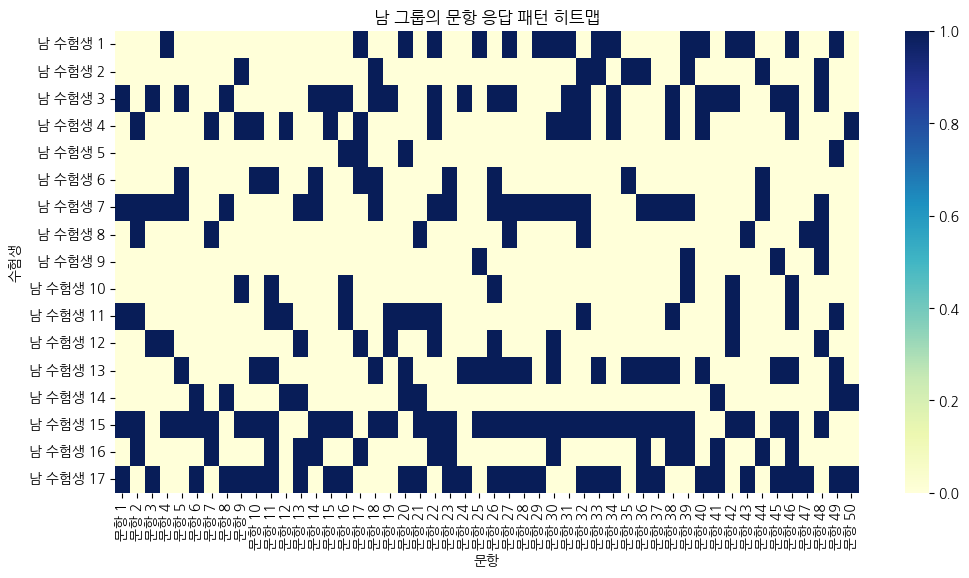

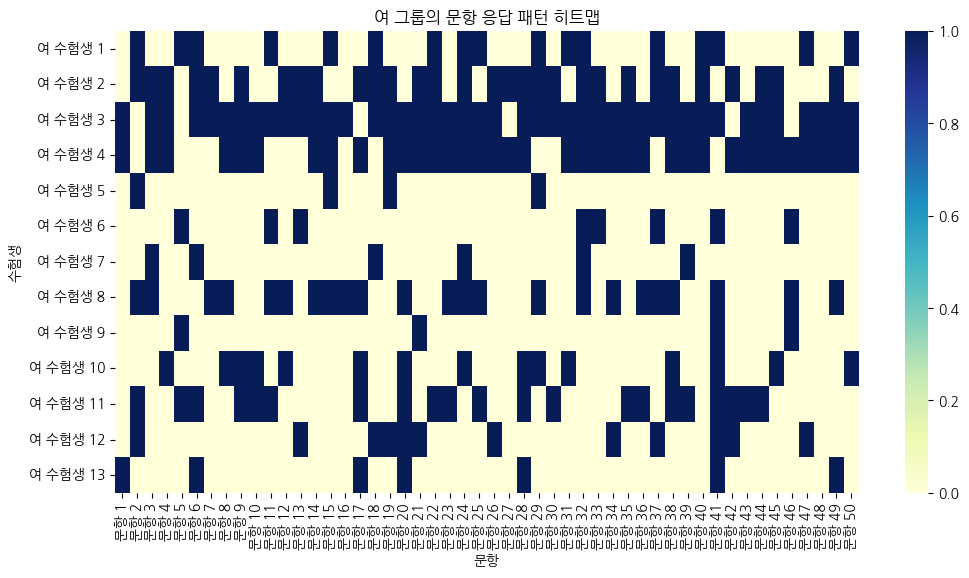

In [11]:
import seaborn as sns

for group in group_names:
    group_indices = np.where(group_labels == group)[0]
    group_data = data[group_indices, :]
    plt.figure(figsize=(12, 6))
    sns.heatmap(group_data, cmap='YlGnBu', xticklabels=[f'문항 {i+1}' for i in range(n_items)],
                yticklabels=[f'{group} 수험생 {i+1}' for i in range(len(group_indices))])
    plt.xlabel('문항')
    plt.ylabel('수험생')
    plt.title(f'{group} 그룹의 문항 응답 패턴 히트맵')
    plt.show()

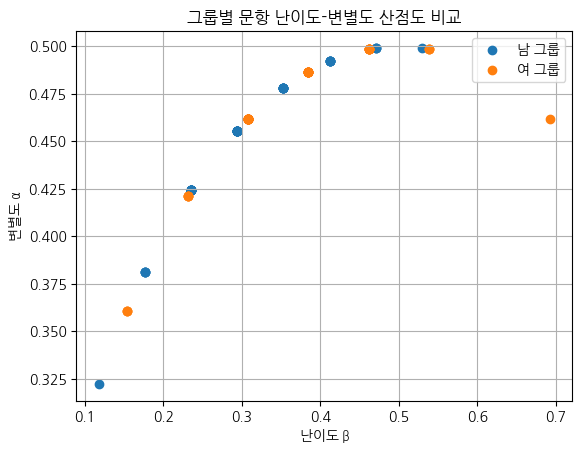

In [12]:
# 그룹별로 문항 매개변수를 추정해야 하지만, 여기서는 예시로 그룹별 문항 난이도와 변별도의 평균을 사용합니다.

for group in group_names:
    # 그룹별 문항 난이도와 변별도의 평균 계산 (단순 평균으로 예시)
    group_indices = np.where(group_labels == group)[0]
    group_data = data[group_indices, :]
    group_beta_mean = group_data.mean(axis=0)
    group_alpha_mean = group_data.std(axis=0)
    plt.scatter(group_beta_mean, group_alpha_mean, label=f'{group} 그룹')

plt.xlabel('난이도 β')
plt.ylabel('변별도 α')
plt.title('그룹별 문항 난이도-변별도 산점도 비교')
plt.legend()
plt.grid(True)
plt.show()

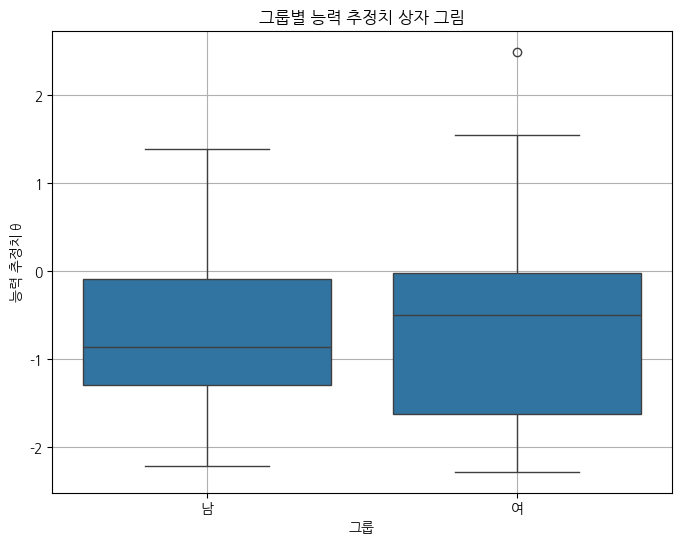

In [13]:
import seaborn as sns

# 데이터프레임 생성
data_for_plot = pd.DataFrame({
    '능력 추정치': theta_est,
    '그룹': group_labels
})

plt.figure(figsize=(8, 6))
sns.boxplot(x='그룹', y='능력 추정치', data=data_for_plot)
plt.xlabel('그룹')
plt.ylabel('능력 추정치 θ')
plt.title('그룹별 능력 추정치 상자 그림')
plt.grid(True)
plt.show()

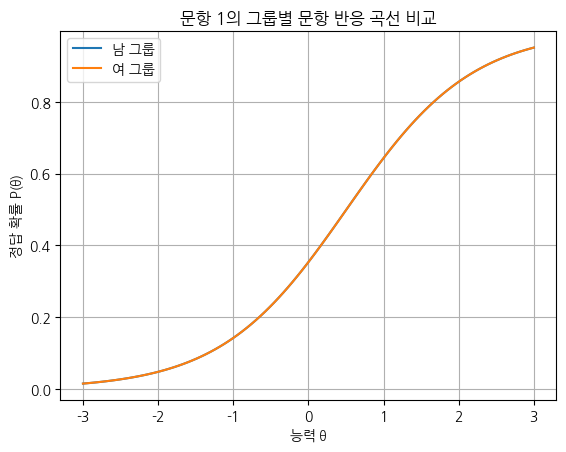

In [14]:
item_index = 0

theta_range = np.linspace(-3, 3, 100)

for group in group_names:
    theta_group = theta_est[group_labels == group]
    alpha_i = alpha_est[item_index]
    beta_i = beta_est[item_index]
    p_theta = 1 / (1 + np.exp(-alpha_i * (theta_range - beta_i)))
    plt.plot(theta_range, p_theta, label=f'{group} 그룹')

plt.xlabel('능력 θ')
plt.ylabel('정답 확률 P(θ)')
plt.title(f'문항 {item_index+1}의 그룹별 문항 반응 곡선 비교')
plt.legend()
plt.grid(True)
plt.show()

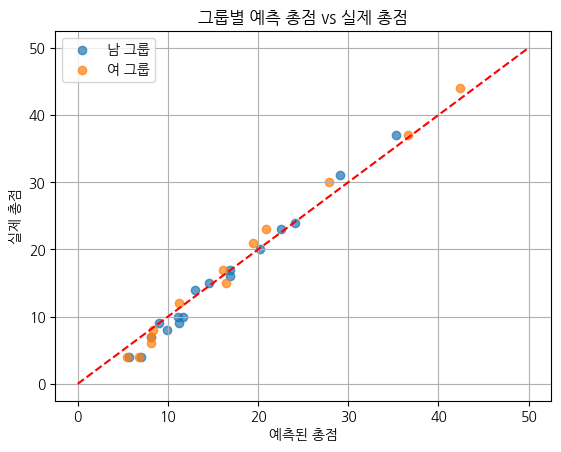

In [15]:
for group in group_names:
    group_indices = np.where(group_labels == group)[0]
    actual_scores = data[group_indices, :].sum(axis=1)
    expected_scores = []
    for i in group_indices:
        theta_i = theta_est[i]
        p_i = 1 / (1 + np.exp(-alpha_est * (theta_i - beta_est)))
        expected_scores.append(p_i.sum())
    expected_scores = np.array(expected_scores)
    plt.scatter(expected_scores, actual_scores, alpha=0.7, label=f'{group} 그룹')

plt.plot([0, n_items], [0, n_items], 'r--')
plt.xlabel('예측된 총점')
plt.ylabel('실제 총점')
plt.title('그룹별 예측 총점 vs 실제 총점')
plt.legend()
plt.grid(True)
plt.show()

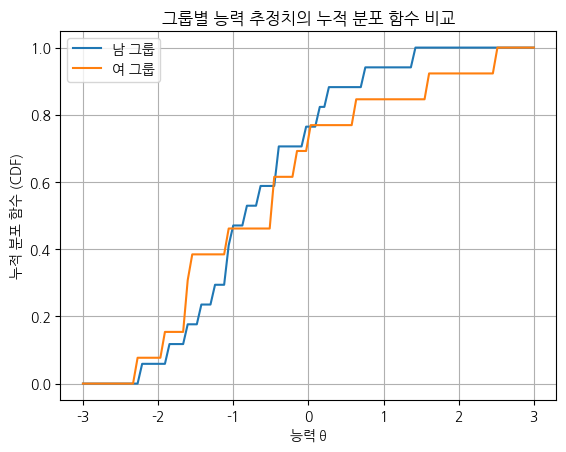

In [16]:
from scipy.stats import norm

theta_range = np.linspace(-3, 3, 100)

for group in group_names:
    theta_group = theta_est[group_labels == group]
    cdf = [np.mean(theta_group <= t) for t in theta_range]
    plt.plot(theta_range, cdf, label=f'{group} 그룹')

plt.xlabel('능력 θ')
plt.ylabel('누적 분포 함수 (CDF)')
plt.title('그룹별 능력 추정치의 누적 분포 함수 비교')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# 예를 들어, 학습 시간이 데이터프레임에 있다고 가정
study_time = df['학습 시간'].values

for group in group_names:
    theta_group = theta_est[group_labels == group]
    study_time_group = study_time[group_labels == group]
    plt.scatter(study_time_group, theta_group, alpha=0.7, label=f'{group} 그룹')

plt.xlabel('학습 시간')
plt.ylabel('능력 추정치 θ')
plt.title('그룹별 학습 시간과 능력 추정치의 상관관계')
plt.legend()
plt.grid(True)
plt.show()

KeyError: '학습 시간'

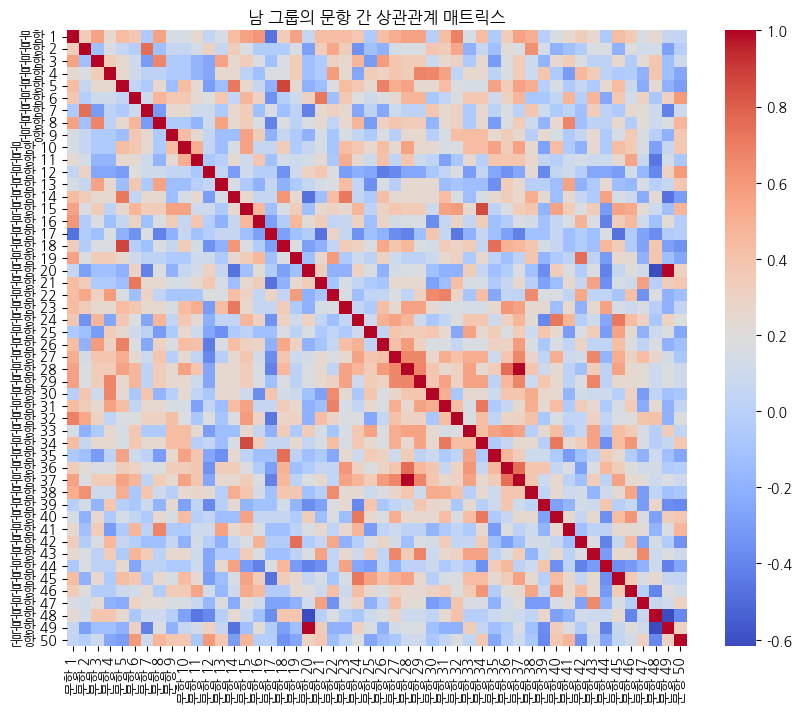

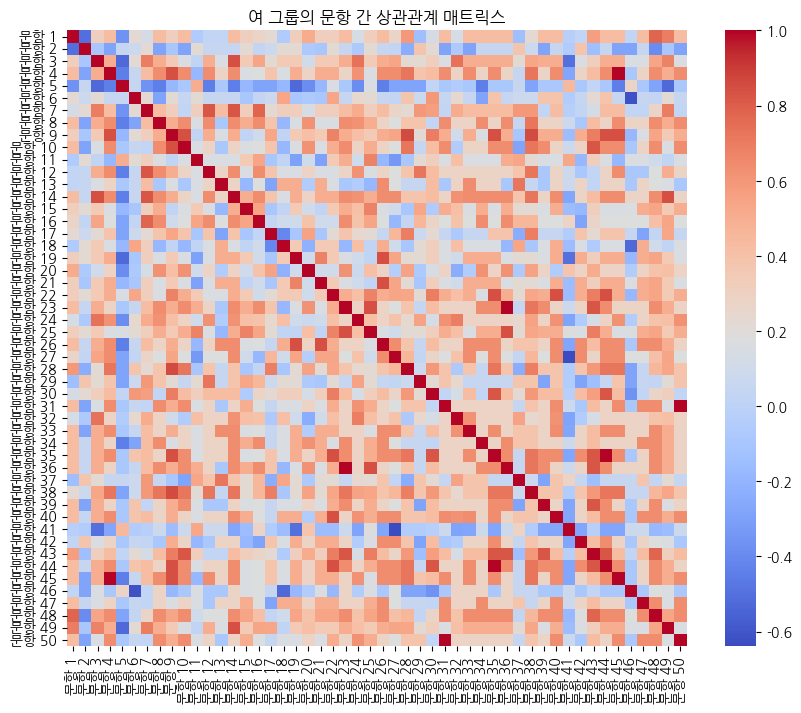

In [18]:
import seaborn as sns

for group in group_names:
    group_indices = np.where(group_labels == group)[0]
    group_data = data[group_indices, :]
    corr_matrix = np.corrcoef(group_data.T)
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm',
                xticklabels=[f'문항 {i+1}' for i in range(n_items)],
                yticklabels=[f'문항 {i+1}' for i in range(n_items)])
    plt.title(f'{group} 그룹의 문항 간 상관관계 매트릭스')
    plt.show()

In [19]:
# 간단한 Mantel-Haenszel 방법을 사용하여 DIF 통계량 계산 (실제로는 추가적인 통계 분석 필요)
dif_stats = []
for i in range(n_items):
    # 문항 i에 대한 응답
    responses = data[:, i]
    # 그룹별로 응답 분포 계산
    group_responses = {}
    for group in group_names:
        group_indices = np.where(group_labels == group)[0]
        group_responses[group] = responses[group_indices]
    # DIF 통계량 계산 (예: 정답률 차이)
    dif_stat = abs(group_responses[group_names[0]].mean() - group_responses[group_names[1]].mean())
    dif_stats.append(dif_stat)

# 결과를 데이터프레임으로 정리
dif_df = pd.DataFrame({
    '문항 번호': [f'문항 {i+1}' for i in range(n_items)],
    'DIF 통계량': dif_stats
})
print(dif_df)

    문항 번호   DIF 통계량
0    문항 1  0.063348
1    문항 2  0.108597
2    문항 3  0.149321
3    문항 4  0.072398
4    문항 5  0.013575
5    문항 6  0.285068
6    문항 7  0.004525
7    문항 8  0.072398
8    문항 9  0.090498
9   문항 10  0.013575
10  문항 11  0.027149
11  문항 12  0.131222
12  문항 13  0.013575
13  문항 14  0.013575
14  문항 15  0.149321
15  문항 16  0.199095
16  문항 17  0.108597
17  문항 18  0.031674
18  문항 19  0.149321
19  문항 20  0.185520
20  문항 21  0.090498
21  문항 22  0.085973
22  문항 23  0.013575
23  문항 24  0.361991
24  문항 25  0.149321
25  문항 26  0.162896
26  문항 27  0.257919
27  문항 28  0.226244
28  문항 29  0.226244
29  문항 30  0.180995
30  문항 31  0.013575
31  문항 32  0.067873
32  문항 33  0.013575
33  문항 34  0.013575
34  문항 35  0.072398
35  문항 36  0.045249
36  문항 37  0.226244
37  문항 38  0.049774
38  문항 39  0.104072
39  문항 40  0.013575
40  문항 41  0.457014
41  문항 42  0.045249
42  문항 43  0.004525
43  문항 44  0.072398
44  문항 45  0.013575
45  문항 46  0.221719
46  문항 47  0.190045
47  문항 48  0.257919
48  문항 49  0.031674


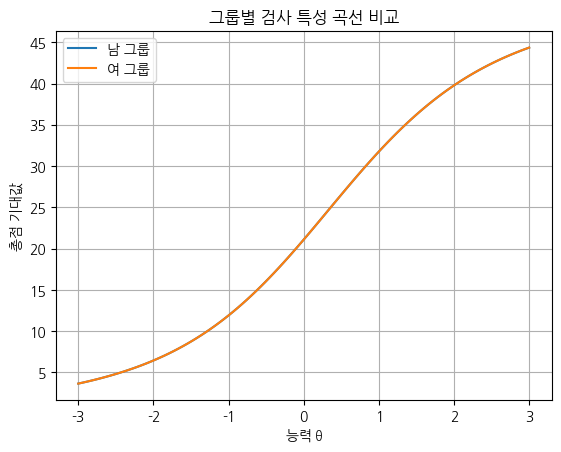

In [20]:
theta_range = np.linspace(-3, 3, 100)

for group in group_names:
    tcc = np.zeros_like(theta_range)
    for i in range(n_items):
        alpha_i = alpha_est[i]
        beta_i = beta_est[i]
        p_theta = 1 / (1 + np.exp(-alpha_i * (theta_range - beta_i)))
        tcc += p_theta
    plt.plot(theta_range, tcc, label=f'{group} 그룹')

plt.xlabel('능력 θ')
plt.ylabel('총점 기대값')
plt.title('그룹별 검사 특성 곡선 비교')
plt.legend()
plt.grid(True)
plt.show()